In [1]:
import mne

In [2]:
filepath = [r"C:\Users\bio86\Downloads\NIRS_01-29\subject 01\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 02\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 03\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 04\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 05\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 06\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 07\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 08\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 09\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 10\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 11\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 12\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 13\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 14\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 15\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 16\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 17\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 18\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 19\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 20\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 21\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 22\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 23\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 24\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 25\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 26\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 27\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 28\cnt.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 29\cnt.mat"]

In [5]:
#Save the raw data in the dictionary
import numpy as np
from scipy.io import loadmat
import pandas as pd

nirs_matlab = {}

for i in range(29):
    nirs_matlab["subject{0}".format(i+1)] = loadmat(filepath[0])
    
nirs_channels = [item.flat[0] for item in nirs_matlab["subject1"]['cnt'][0][0]['clab'][0][0][0]]    

In [6]:
# Montage data

mnt = loadmat(r"C:\Users\bio86\Downloads\NIRS_01-29\subject 19\mnt.mat")

pos_3d = (mnt['mnt']['pos_3d'][0][0].T)/10

#Load source info

sources = (mnt['mnt']['source'][0][0][0][0][2].T)/10

#Load detector info

detectors = (mnt['mnt']['detector'][0][0][0][0][2].T)/10

In [7]:
pairs = mnt['mnt']['sd'][0][0]

In [8]:
n_channels = ['S2_D1 760','S2_D1 850','S3_D1 760','S3_D1 850','S3_D2 760','S3_D2 850','S4_D1 760',
              'S4_D1 850','S4_D2 760','S4_D2 850','S4_D3 760','S4_D3 850','S5_D2 760','S5_D2 850',
              'S5_D3 760','S5_D3 850','S6_D3 760','S6_D3 850','S7_D4 760','S7_D4 850','S7_D6 760',
              'S7_D6 850','S7_D7 760','S7_D7 850','S9_D5 760','S9_D5 850','S9_D9 760','S9_D9 850',
              'S9_D10 760','S9_D10 850','S10_D9 760','S10_D9 850','S10_D10 760','S10_D10 850',
              'S10_D11 760','S10_D11 850','S11_D5 760','S11_D5 850','S11_D10 760','S11_D10 850',
              'S11_D12 760','S11_D12 850','S12_D10 760','S12_D10 850','S12_D11 760','S12_D11 850',
              'S12_D12 760','S12_D12 850','S13_D13 760','S13_D13 850','S13_D14 760','S13_D14 850',
              'S13_D15 760','S13_D15 850','S14_D13 760','S14_D13 850','S14_D15 760','S14_D15 850',
              'S14_D16 760','S14_D16 850','S15_D8 760','S15_D8 850','S15_D14 760','S15_D14 850',
              'S15_D15 760','S15_D15 850','S16_D8 760','S16_D8 850','S16_D15 760','S16_D15 850',
              'S16_D16 760','S16_D16 850']

In [9]:
# Initialize an info structure

#Info Structure for Low Work Load Raw Data
info = mne.create_info(
    ch_names=n_channels,
    ch_types=['fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw'],
    sfreq=int(10))

In [10]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: S2_D1 760, S2_D1 850, S3_D1 760, S3_D1 850, S3_D2 760, S3_D2 ...
 chs: 72 FNIRS_RAW
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 5.0 Hz
 meas_date: unspecified
 nchan: 72
 projs: []
 sfreq: 10.0 Hz
>

In [11]:
#Manually assign 3D coordinates to the info structure
x=0
for ch in range(36):
    for coor in range(3):
        info['chs'][x]['loc'][coor] = pos_3d[ch][coor]
        info['chs'][x+1]['loc'][coor] = pos_3d[ch][coor]
    x+=2

In [12]:
#Assign manually source locations

x=0
for ch in range(36):
    for coor in range(3):
        info['chs'][x]['loc'][coor+3] = sources[pairs[ch][0]-1][coor]
        info['chs'][x+1]['loc'][coor+3] = sources[pairs[ch][0]-1][coor]
    x+=2

In [13]:
#Assign manually detector locations

x=0
for ch in range(36):
    for coor in range(3):
        info['chs'][x]['loc'][coor+6] = detectors[pairs[ch][1]-1][coor]
        info['chs'][x+1]['loc'][coor+6] = detectors[pairs[ch][1]-1][coor]
    x+=2

In [14]:
#Assign wavelengths
for x in info['chs'][0::2]:
    x['loc'][9] = 760

for x in info['chs'][1::2]:
    x['loc'][9] = 850

In [15]:
info['chs']

[{'loc': array([-4.53984172e-02,  8.91009747e-02,  5.06226775e-06, -5.87800000e-02,
          8.09000000e-02,  0.00000000e+00, -3.09000000e-02,  9.51100000e-02,
          1.00000000e-05,  7.60000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S2_D1 760',
  'scanno': 1,
  'logno': 1},
 {'loc': array([-4.53984172e-02,  8.91009747e-02,  5.06226775e-06, -5.87800000e-02,
          8.09000000e-02,  0.00000000e+00, -3.09000000e-02,  9.51100000e-02,
          1.00000000e-05,  8.50000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S2_D1 850',
  'scanno': 2,
  'logno': 2},
 {'loc': array([-3.3

In [17]:
#Data divided in three sessions

nirs_matcnt1 = {}
nirs_matcnt2 = {}
nirs_matcnt3 = {}

for i in range(29):
    nirs_matcnt1["subject{0}".format(i+1)] = pd.DataFrame([[row.flat[0] for row in line] for line
                                                        in nirs_matlab["subject{0}".format(i+1)]['cnt'][0][0]['x'][0][0]],
                                                        columns=nirs_channels)
    #print(nirs_matcnt1)
    nirs_matcnt2["subject{0}".format(i+1)] = pd.DataFrame([[row.flat[0] for row in line] for line
                                                        in nirs_matlab["subject{0}".format(i+1)]['cnt'][0][2]['x'][0][0]],
                                                        columns=nirs_channels)
    #print(nirs_matcnt2)
    nirs_matcnt3["subject{0}".format(i+1)] = pd.DataFrame([[row.flat[0] for row in line] for line
                                                        in nirs_matlab["subject{0}".format(i+1)]['cnt'][0][4]['x'][0][0]],
                                                        columns=nirs_channels)
    #print(nirs_matcnt3)

In [23]:
#Reorder columns

for i in range(29): 
    nirs_matcnt1["subject{0}".format(i+1)]=nirs_matcnt1["subject{0}".format(i+1)][['AF7Fp1lowWL','AF7Fp1highWL','AF3Fp1lowWL',
                                                                     'AF3Fp1highWL','AF3AFzlowWL','AF3AFzhighWL',
                                                                     'FpzFp1lowWL','FpzFp1highWL','FpzAFzlowWL',
                                                                     'FpzAFzhighWL','FpzFp2lowWL','FpzFp2highWL', 
                                                                     'AF4AFzlowWL','AF4AFzhighWL','AF4Fp2lowWL',
                                                                     'AF4Fp2highWL','AF8Fp2lowWL','AF8Fp2highWL',
                                                                     'OzPOzlowWL','OzPOzhighWL','OzO1lowWL',
                                                                     'OzO1highWL','OzO2lowWL','OzO2highWL',
                                                                     'C5CP5lowWL','C5CP5highWL','C5FC5lowWL',
                                                                     'C5FC5highWL','C5C3lowWL','C5C3highWL',
                                                                     'FC3FC5lowWL','FC3FC5highWL','FC3C3lowWL',
                                                                     'FC3C3highWL','FC3FC1lowWL','FC3FC1highWL',
                                                                     'CP3CP5lowWL','CP3CP5highWL','CP3C3lowWL',
                                                                     'CP3C3highWL','CP3CP1lowWL','CP3CP1highWL',
                                                                     'C1C3lowWL','C1C3highWL','C1FC1lowWL','C1FC1highWL',
                                                                     'C1CP1lowWL','C1CP1highWL','C2FC2lowWL','C2FC2highWL',
                                                                     'C2CP2lowWL','C2CP2highWL','C2C4lowWL','C2C4highWL',
                                                                     'FC4FC2lowWL','FC4FC2highWL','FC4C4lowWL','FC4C4highWL',
                                                                     'FC4FC6lowWL','FC4FC6highWL','CP4CP6lowWL','CP4CP6highWL',
                                                                     'CP4CP2lowWL','CP4CP2highWL','CP4C4lowWL','CP4C4highWL',
                                                                     'C6CP6lowWL','C6CP6highWL','C6C4lowWL','C6C4highWL',
                                                                        'C6FC6lowWL','C6FC6highWL']]
    nirs_matcnt2["subject{0}".format(i+1)]=nirs_matcnt2["subject{0}".format(i+1)][['AF7Fp1lowWL','AF7Fp1highWL','AF3Fp1lowWL',
                                                                     'AF3Fp1highWL','AF3AFzlowWL','AF3AFzhighWL',
                                                                     'FpzFp1lowWL','FpzFp1highWL','FpzAFzlowWL',
                                                                     'FpzAFzhighWL','FpzFp2lowWL','FpzFp2highWL', 
                                                                     'AF4AFzlowWL','AF4AFzhighWL','AF4Fp2lowWL',
                                                                     'AF4Fp2highWL','AF8Fp2lowWL','AF8Fp2highWL',
                                                                     'OzPOzlowWL','OzPOzhighWL','OzO1lowWL',
                                                                     'OzO1highWL','OzO2lowWL','OzO2highWL',
                                                                     'C5CP5lowWL','C5CP5highWL','C5FC5lowWL',
                                                                     'C5FC5highWL','C5C3lowWL','C5C3highWL',
                                                                     'FC3FC5lowWL','FC3FC5highWL','FC3C3lowWL',
                                                                     'FC3C3highWL','FC3FC1lowWL','FC3FC1highWL',
                                                                     'CP3CP5lowWL','CP3CP5highWL','CP3C3lowWL',
                                                                     'CP3C3highWL','CP3CP1lowWL','CP3CP1highWL',
                                                                     'C1C3lowWL','C1C3highWL','C1FC1lowWL','C1FC1highWL',
                                                                     'C1CP1lowWL','C1CP1highWL','C2FC2lowWL','C2FC2highWL',
                                                                     'C2CP2lowWL','C2CP2highWL','C2C4lowWL','C2C4highWL',
                                                                     'FC4FC2lowWL','FC4FC2highWL','FC4C4lowWL','FC4C4highWL',
                                                                     'FC4FC6lowWL','FC4FC6highWL','CP4CP6lowWL','CP4CP6highWL',
                                                                     'CP4CP2lowWL','CP4CP2highWL','CP4C4lowWL','CP4C4highWL',
                                                                     'C6CP6lowWL','C6CP6highWL','C6C4lowWL','C6C4highWL',
                                                                        'C6FC6lowWL','C6FC6highWL']]
    nirs_matcnt3["subject{0}".format(i+1)]=nirs_matcnt3["subject{0}".format(i+1)][['AF7Fp1lowWL','AF7Fp1highWL','AF3Fp1lowWL',
                                                                     'AF3Fp1highWL','AF3AFzlowWL','AF3AFzhighWL',
                                                                     'FpzFp1lowWL','FpzFp1highWL','FpzAFzlowWL',
                                                                     'FpzAFzhighWL','FpzFp2lowWL','FpzFp2highWL', 
                                                                     'AF4AFzlowWL','AF4AFzhighWL','AF4Fp2lowWL',
                                                                     'AF4Fp2highWL','AF8Fp2lowWL','AF8Fp2highWL',
                                                                     'OzPOzlowWL','OzPOzhighWL','OzO1lowWL',
                                                                     'OzO1highWL','OzO2lowWL','OzO2highWL',
                                                                     'C5CP5lowWL','C5CP5highWL','C5FC5lowWL',
                                                                     'C5FC5highWL','C5C3lowWL','C5C3highWL',
                                                                     'FC3FC5lowWL','FC3FC5highWL','FC3C3lowWL',
                                                                     'FC3C3highWL','FC3FC1lowWL','FC3FC1highWL',
                                                                     'CP3CP5lowWL','CP3CP5highWL','CP3C3lowWL',
                                                                     'CP3C3highWL','CP3CP1lowWL','CP3CP1highWL',
                                                                     'C1C3lowWL','C1C3highWL','C1FC1lowWL','C1FC1highWL',
                                                                     'C1CP1lowWL','C1CP1highWL','C2FC2lowWL','C2FC2highWL',
                                                                     'C2CP2lowWL','C2CP2highWL','C2C4lowWL','C2C4highWL',
                                                                     'FC4FC2lowWL','FC4FC2highWL','FC4C4lowWL','FC4C4highWL',
                                                                     'FC4FC6lowWL','FC4FC6highWL','CP4CP6lowWL','CP4CP6highWL',
                                                                     'CP4CP2lowWL','CP4CP2highWL','CP4C4lowWL','CP4C4highWL',
                                                                     'C6CP6lowWL','C6CP6highWL','C6C4lowWL','C6C4highWL',
                                                                        'C6FC6lowWL','C6FC6highWL']]

In [24]:
nirs_raw1 = {}
nirs_raw2 = {}
nirs_raw3 = {}

#Create raw objects with the new channel names
for i in range(29):
    nirs_raw1["subject{0}".format(i+1)] = mne.io.RawArray(nirs_matcnt1["subject{0}".format(i+1)].T, info)
    nirs_raw2["subject{0}".format(i+1)] = mne.io.RawArray(nirs_matcnt2["subject{0}".format(i+1)].T, info)
    nirs_raw3["subject{0}".format(i+1)] = mne.io.RawArray(nirs_matcnt3["subject{0}".format(i+1)].T, info)

Creating RawArray with float64 data, n_channels=72, n_times=7192
    Range : 0 ... 7191 =      0.000 ...   719.100 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7200
    Range : 0 ... 7199 =      0.000 ...   719.900 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7224
    Range : 0 ... 7223 =      0.000 ...   722.300 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7192
    Range : 0 ... 7191 =      0.000 ...   719.100 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7200
    Range : 0 ... 7199 =      0.000 ...   719.900 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7224
    Range : 0 ... 7223 =      0.000 ...   722.300 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7192
    Range : 0 ... 7191 =      0.000 ...   719.100 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7200
    Range : 0 ... 7199 =      0.000 ...   719.

    Range : 0 ... 7199 =      0.000 ...   719.900 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7224
    Range : 0 ... 7223 =      0.000 ...   722.300 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7192
    Range : 0 ... 7191 =      0.000 ...   719.100 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7200
    Range : 0 ... 7199 =      0.000 ...   719.900 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7224
    Range : 0 ... 7223 =      0.000 ...   722.300 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7192
    Range : 0 ... 7191 =      0.000 ...   719.100 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7200
    Range : 0 ... 7199 =      0.000 ...   719.900 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7224
    Range : 0 ... 7223 =      0.000 ...   722.300 secs
Ready.
Creating RawArray with float64 data, n_channels=7

In [27]:
raw_od1 = {}
raw_od2 = {}
raw_od3 = {}

for i in range(29):
    raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
    raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
    raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
    print(i)
#raw_od1.plot(n_channels=len(raw_od1.ch_names),
#            duration=500, show_scrollbars=False)
#raw_od2.plot(n_channels=len(raw_od2.ch_names),
#            duration=500, show_scrollbars=False)
#raw_od3.plot(n_channels=len(raw_od3.ch_names),
#            duration=500, show_scrollbars=False)

<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format

0
1


<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format

2
3


<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])


4
5


<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format

6
7


<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])


8
9


<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format

10
11


<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])


12
13


<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format

14
15


<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])


16
17


<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format

18
19


<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format

20
21


<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format

22
23


<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])


24
25


<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:6: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od1["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw1["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:7: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od2["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw2["subject{0}".format(i+1)])
<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format

26
27
28


<ipython-input-27-e9fd3ba9d94d>:8: RuntimeWarning: Negative intensities encountered. Setting to abs(x)
  raw_od3["subject{0}".format(i+1)] = mne.preprocessing.nirs.optical_density(nirs_raw3["subject{0}".format(i+1)])


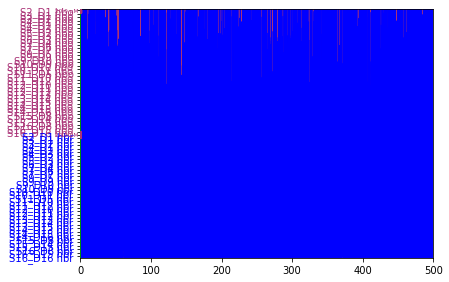

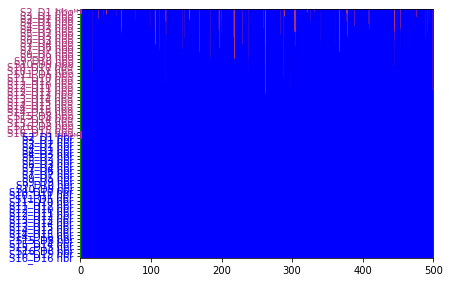

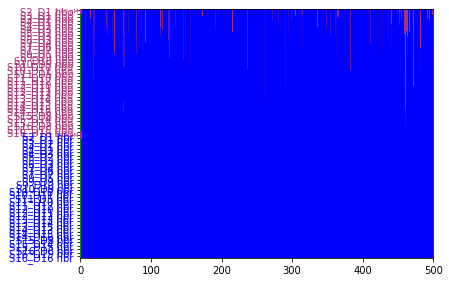

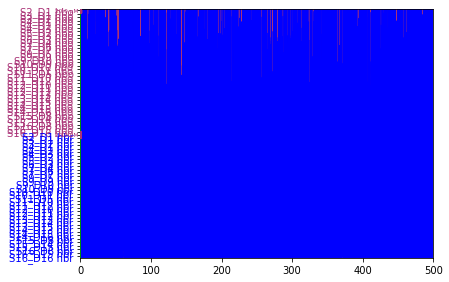

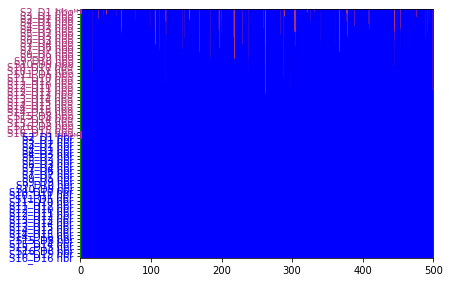

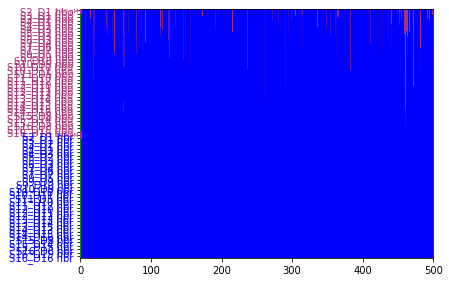

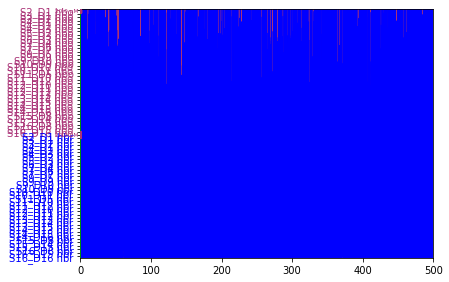

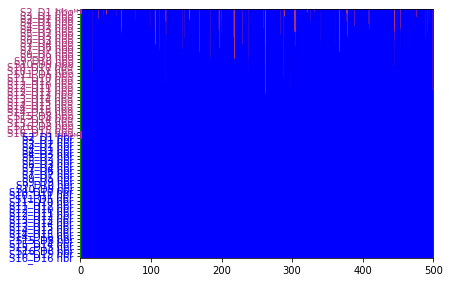

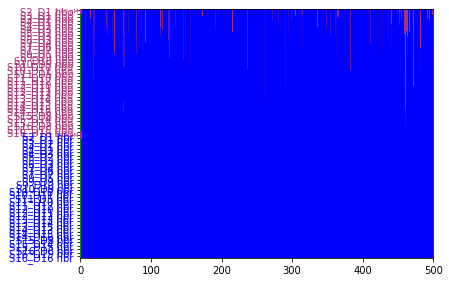

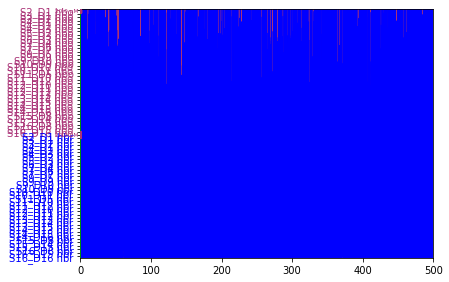

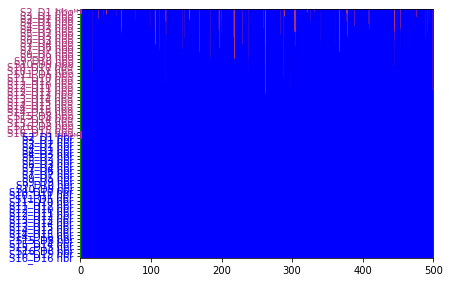

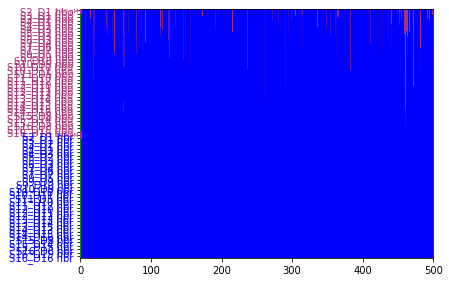

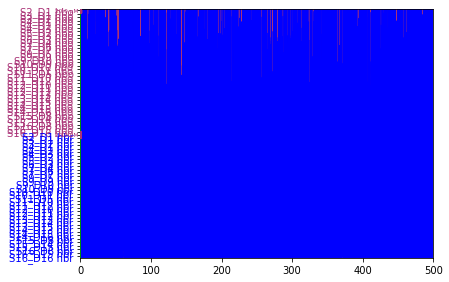

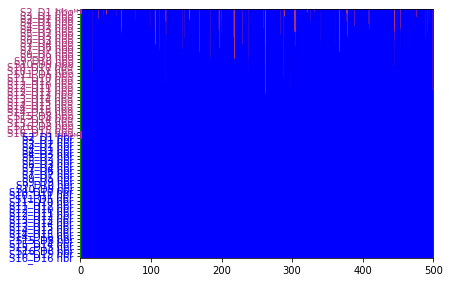

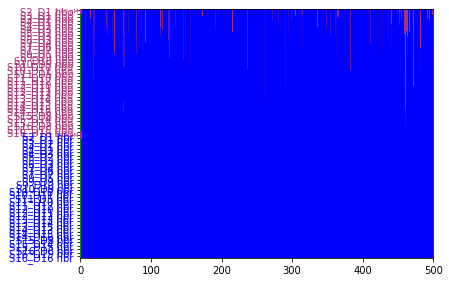

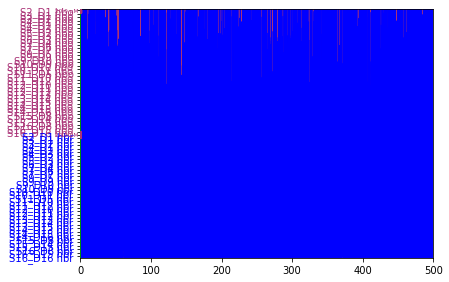

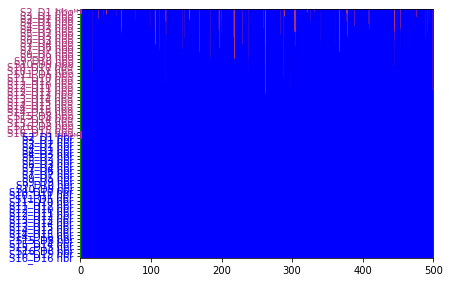

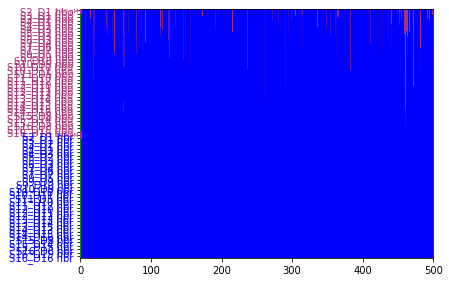

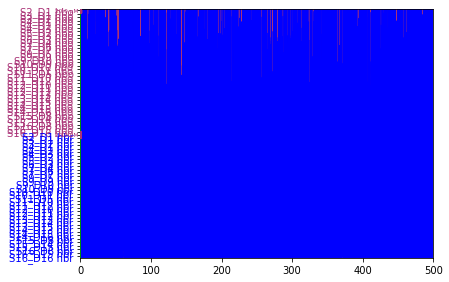

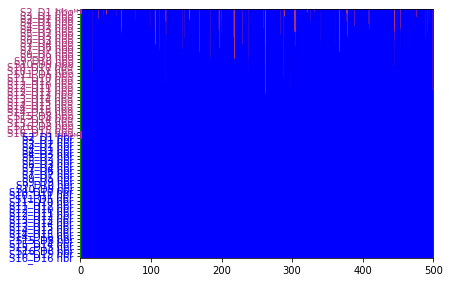

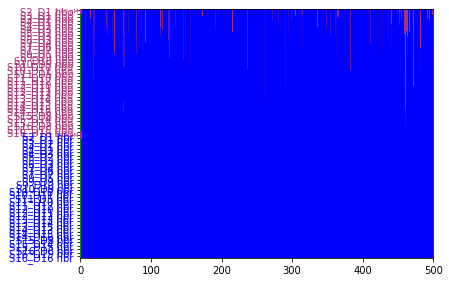

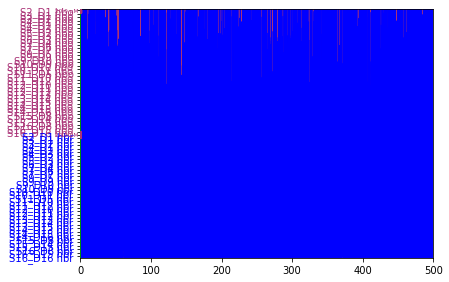

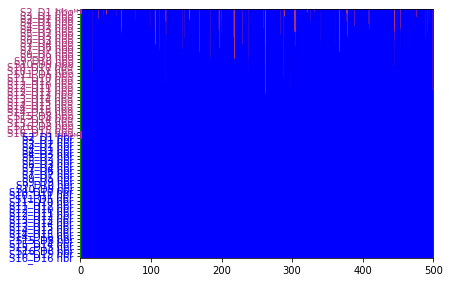

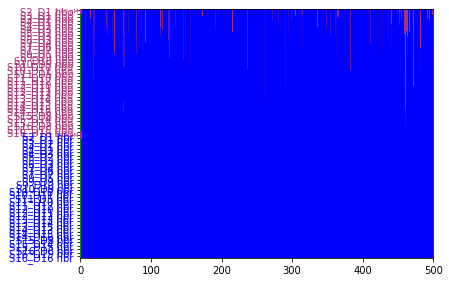

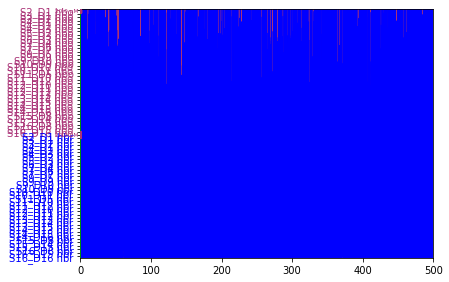

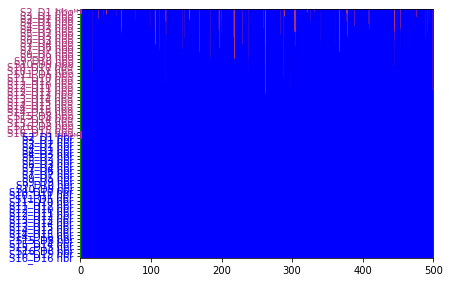

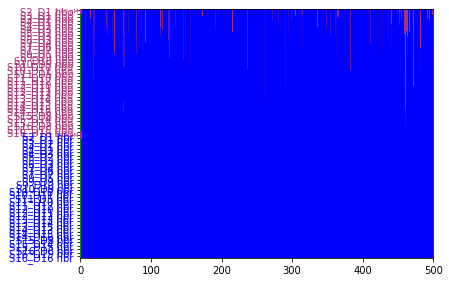

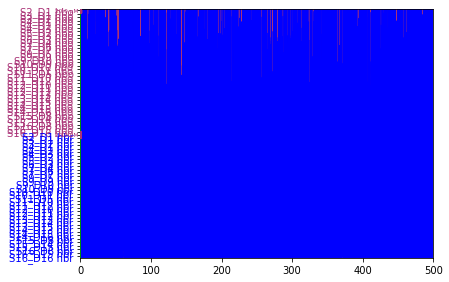

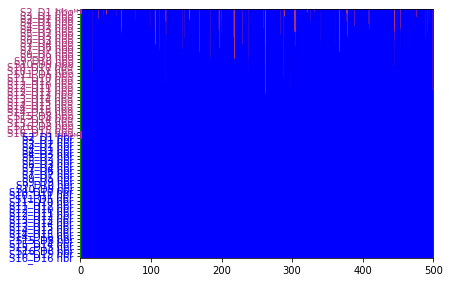

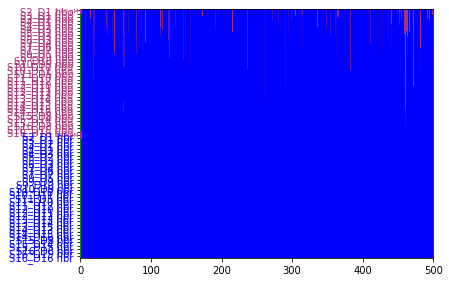

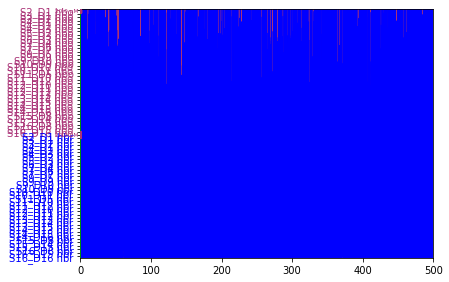

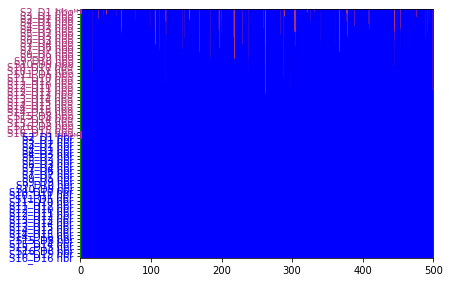

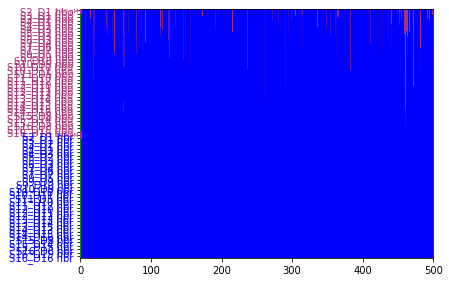

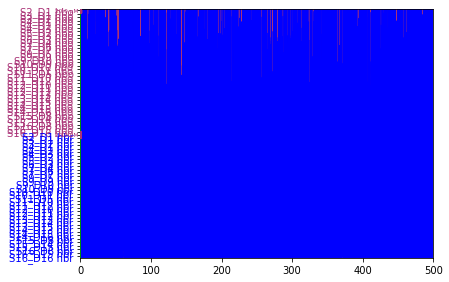

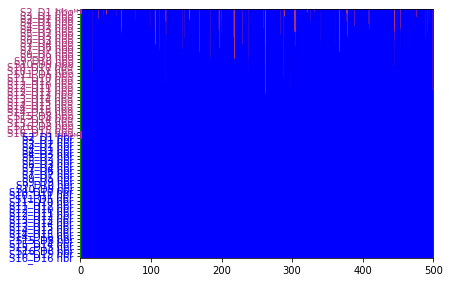

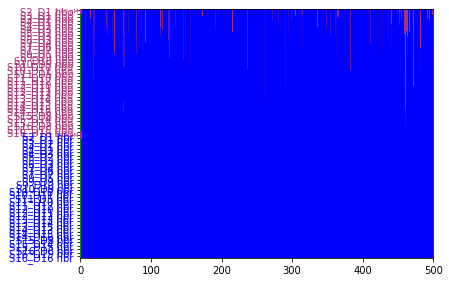

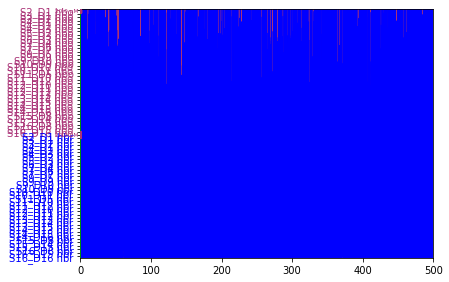

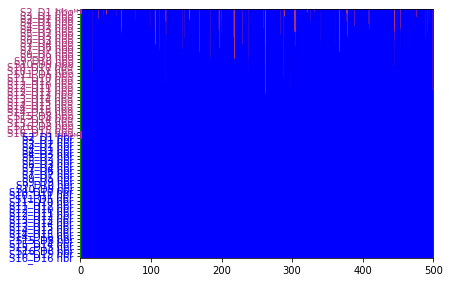

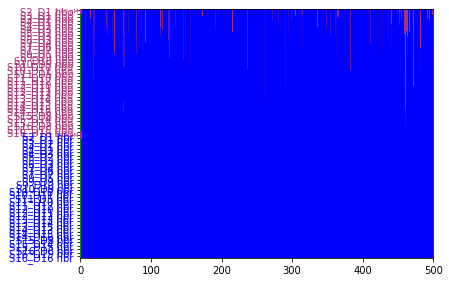

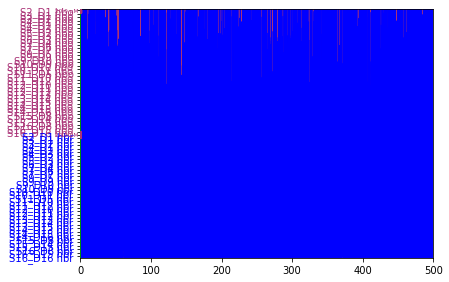

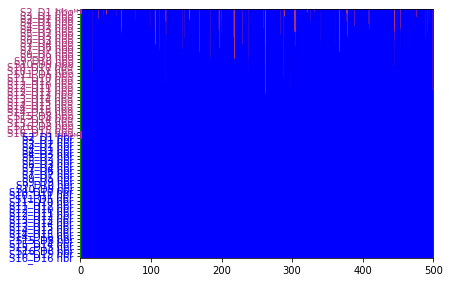

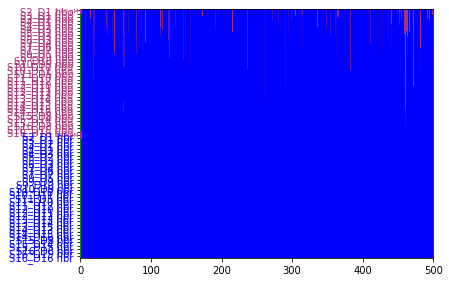

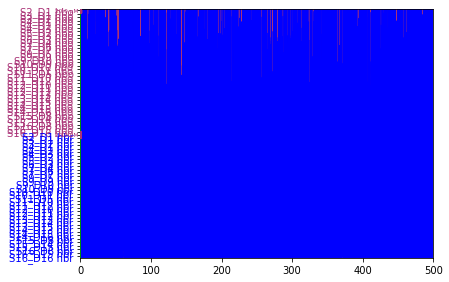

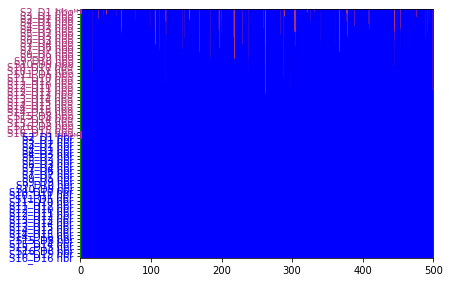

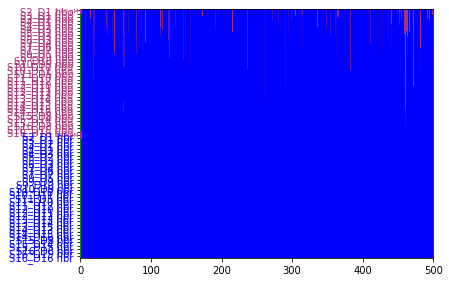

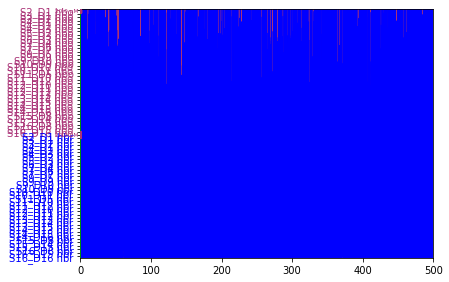

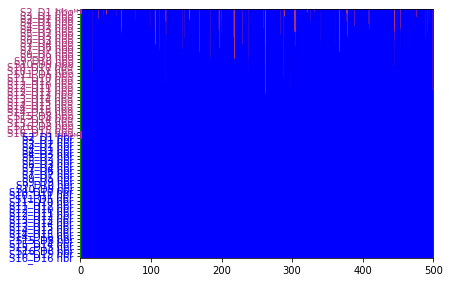

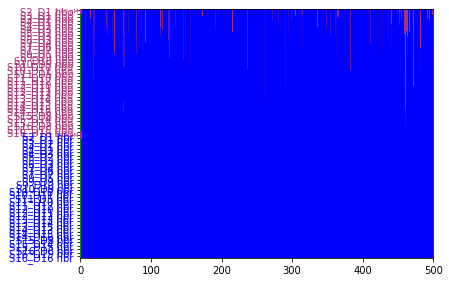

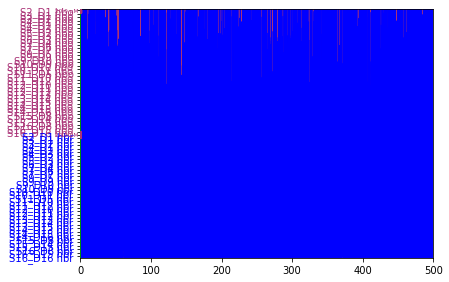

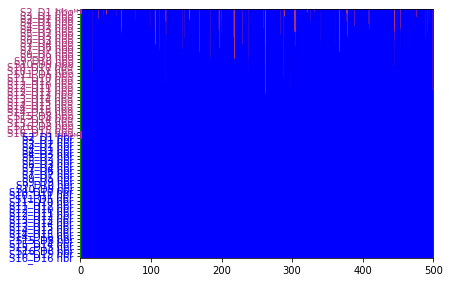

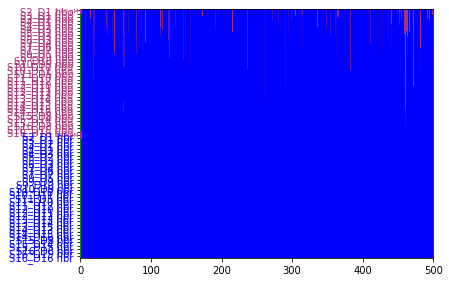

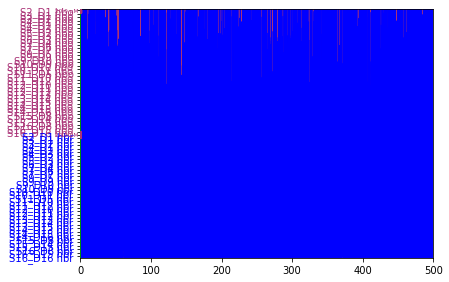

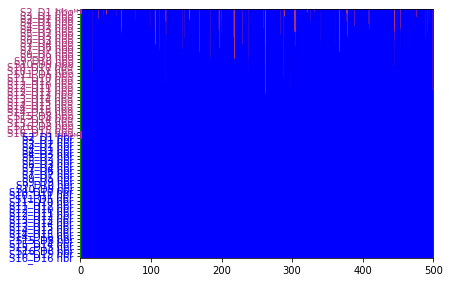

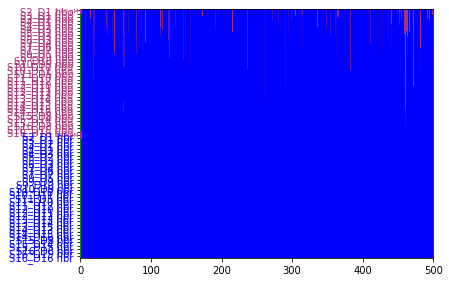

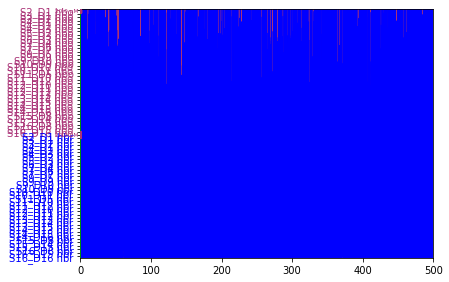

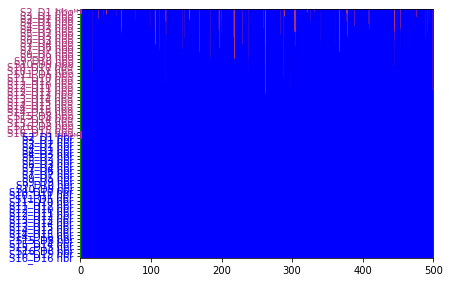

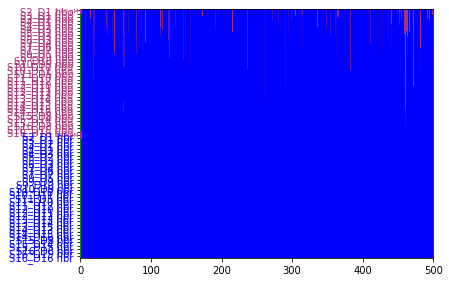

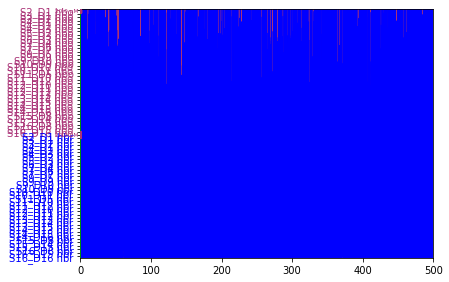

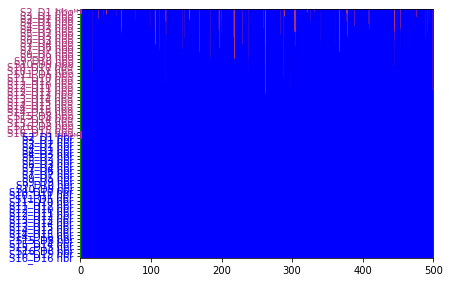

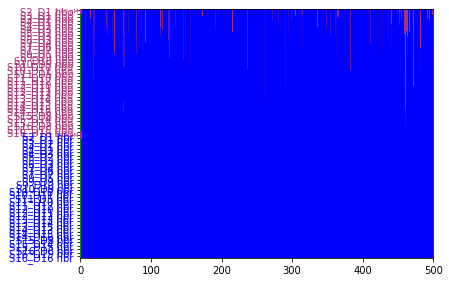

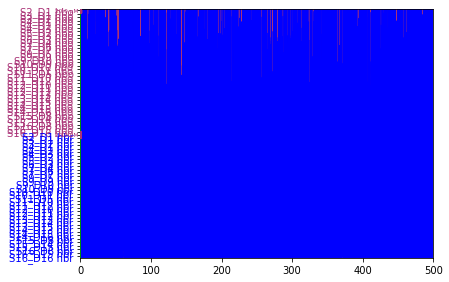

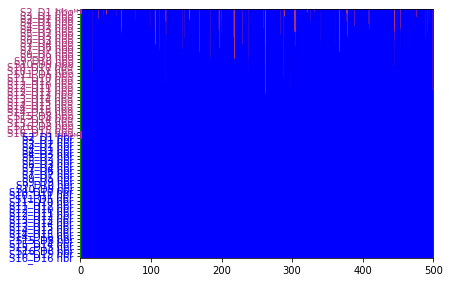

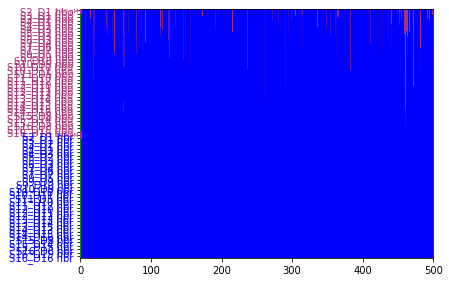

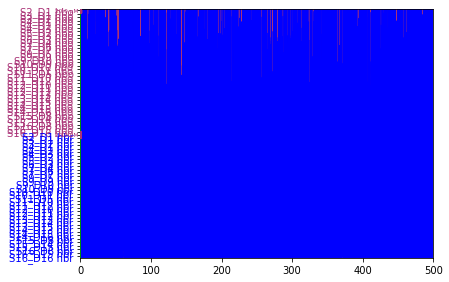

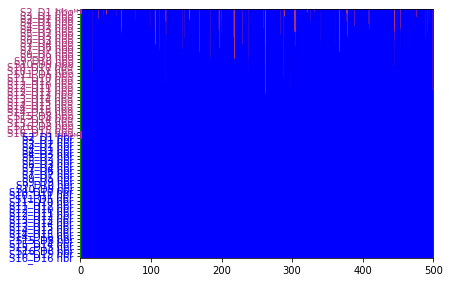

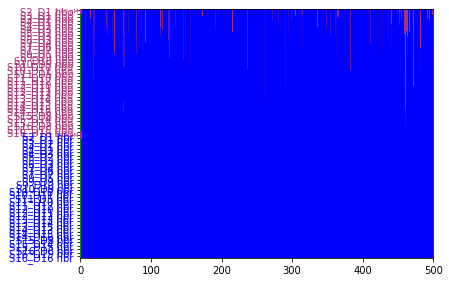

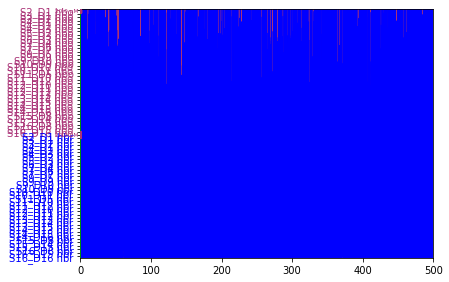

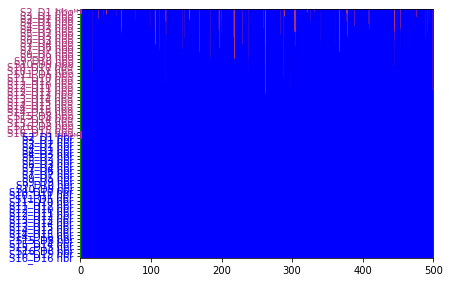

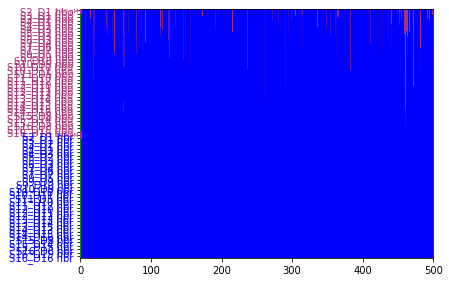

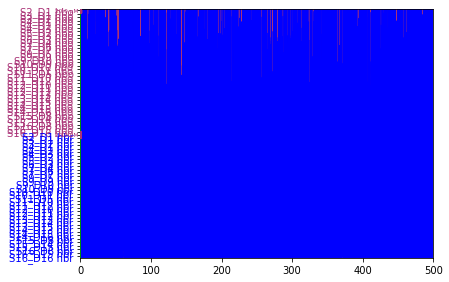

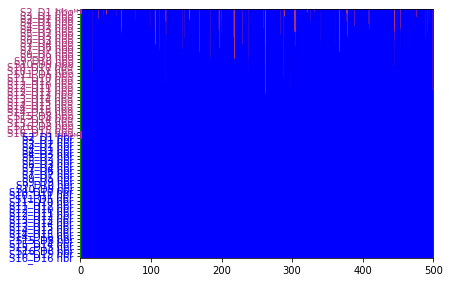

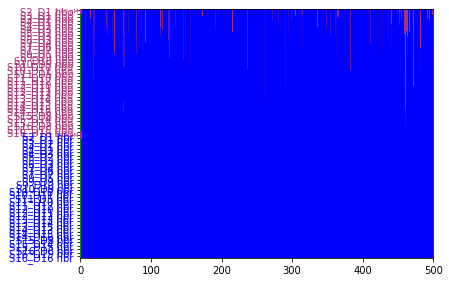

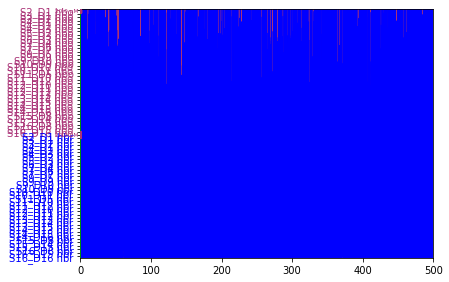

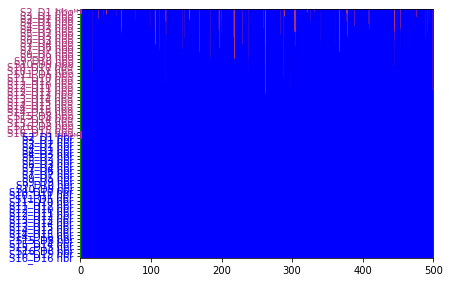

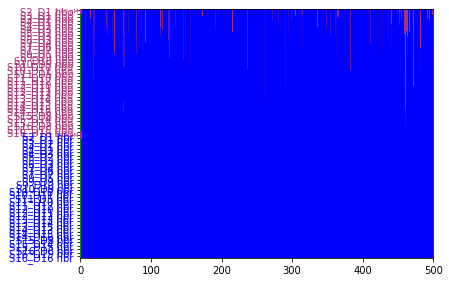

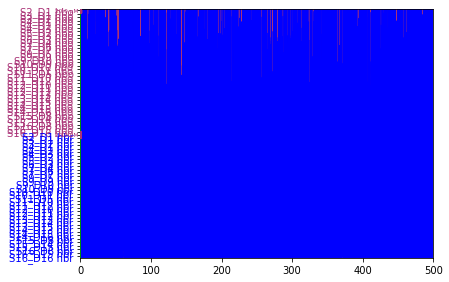

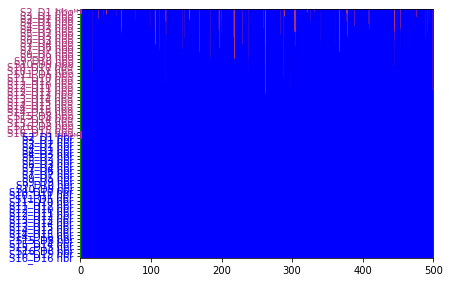

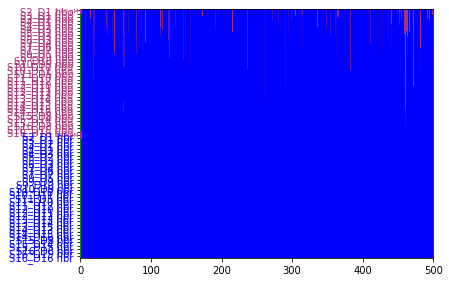

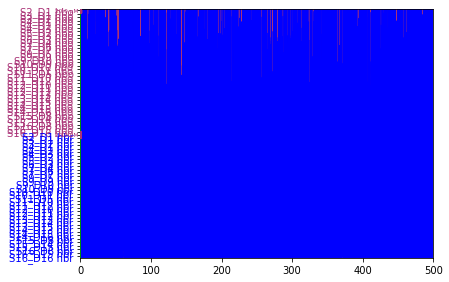

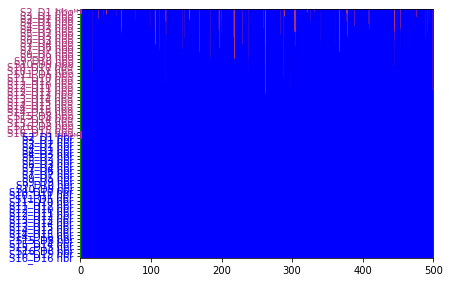

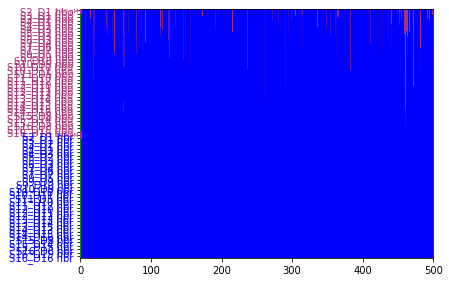

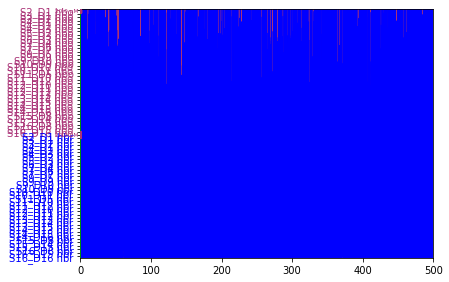

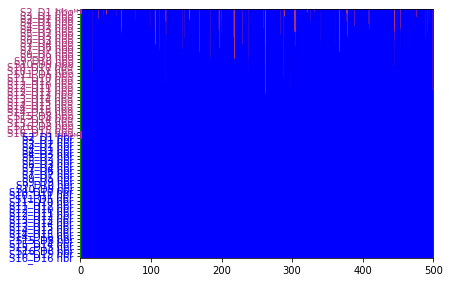

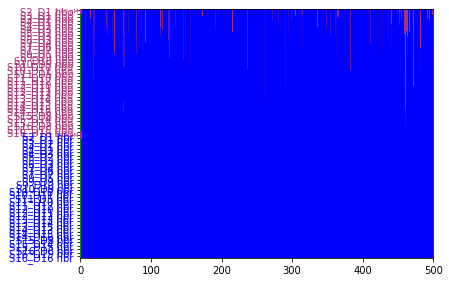

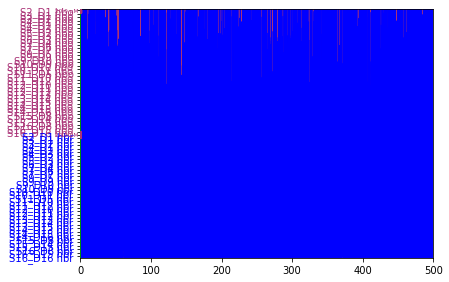

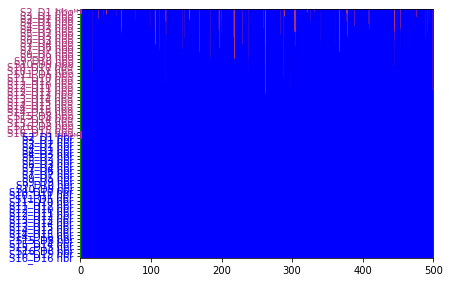

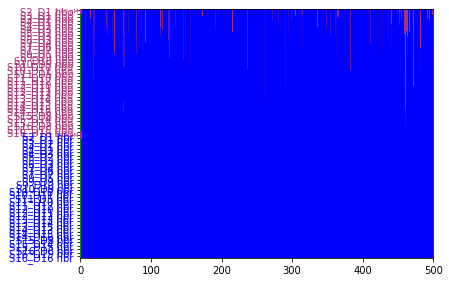

In [28]:
raw1_haemo = {}
raw2_haemo = {}
raw3_haemo = {}

for i in range(29):
    raw1_haemo["subject{0}".format(i+1)] = mne.preprocessing.nirs.beer_lambert_law(raw_od1["subject{0}".format(i+1)])
    raw2_haemo["subject{0}".format(i+1)] = mne.preprocessing.nirs.beer_lambert_law(raw_od2["subject{0}".format(i+1)])
    raw3_haemo["subject{0}".format(i+1)] = mne.preprocessing.nirs.beer_lambert_law(raw_od3["subject{0}".format(i+1)])
    raw1_haemo["subject{0}".format(i+1)].plot(n_channels=len(raw1_haemo["subject{0}".format(i+1)].ch_names),
                   duration=500, show_scrollbars=False)
    raw2_haemo["subject{0}".format(i+1)].plot(n_channels=len(raw2_haemo["subject{0}".format(i+1)].ch_names),
                   duration=500, show_scrollbars=False)
    raw3_haemo["subject{0}".format(i+1)].plot(n_channels=len(raw3_haemo["subject{0}".format(i+1)].ch_names),
                   duration=500, show_scrollbars=False)

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


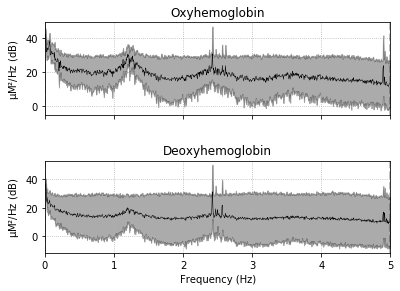

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

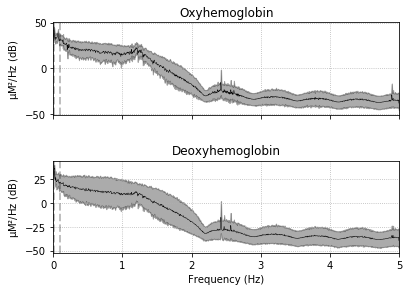

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


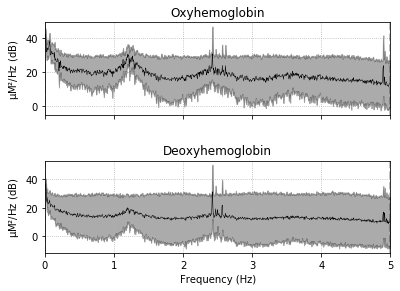

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

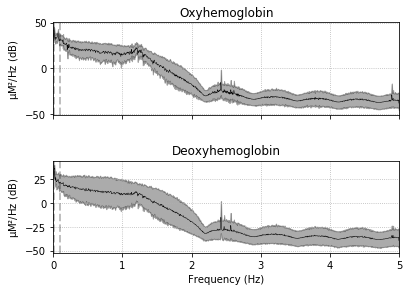

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


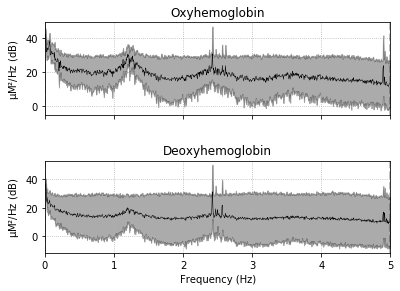

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

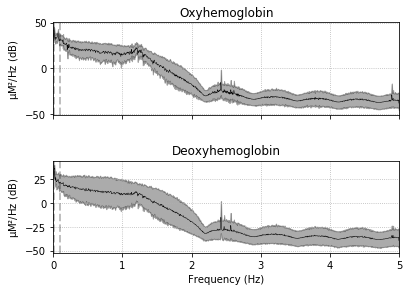

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


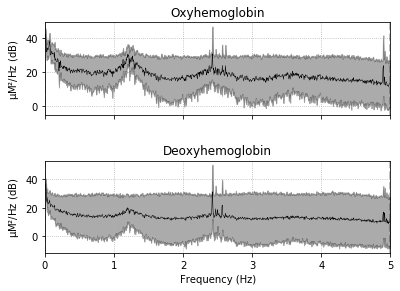

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

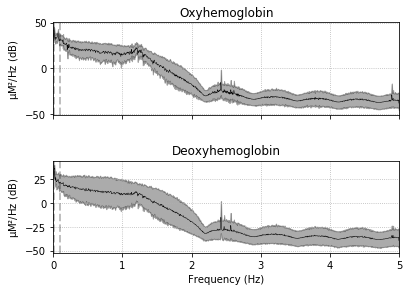

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


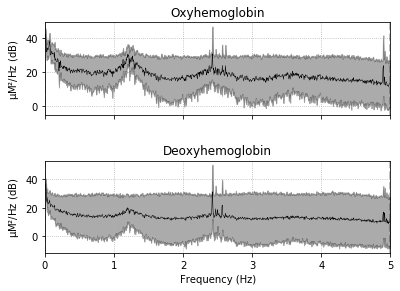

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

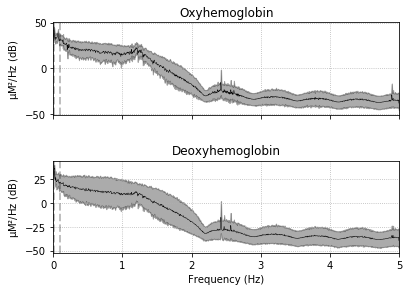

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


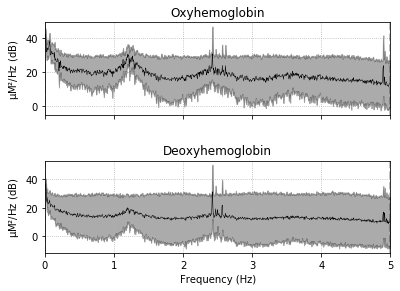

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

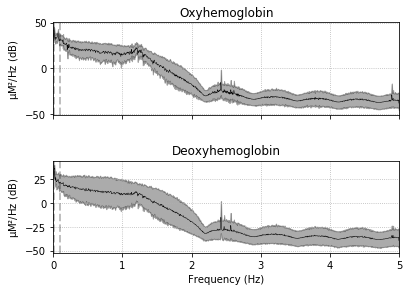

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


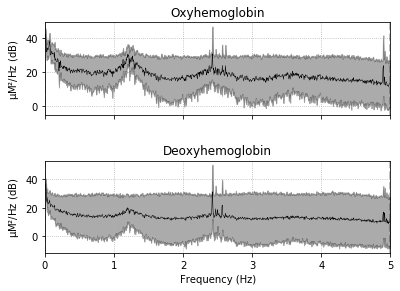

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

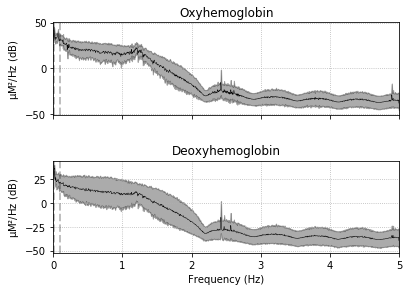

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


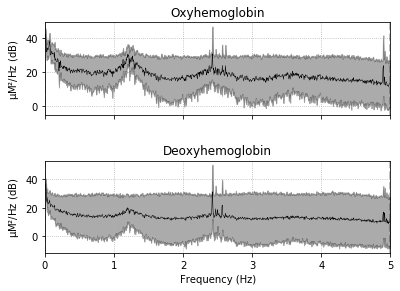

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

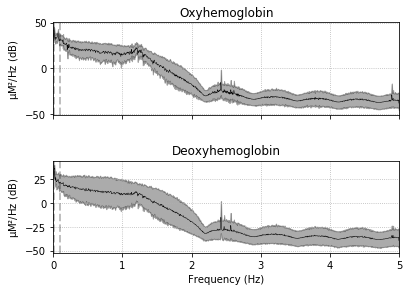

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


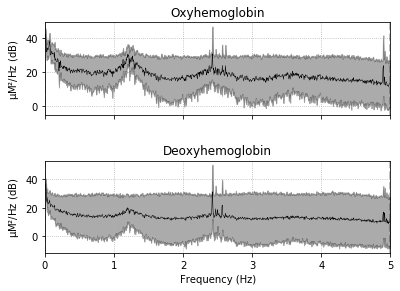

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

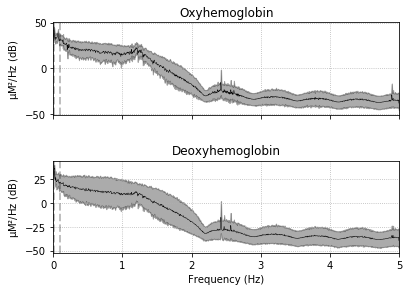

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


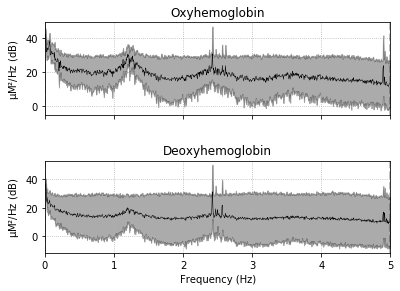

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

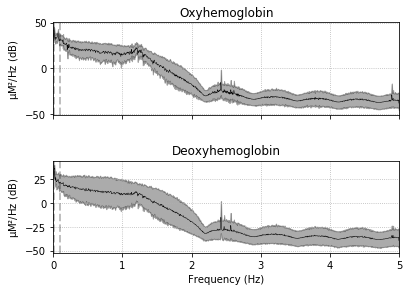

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


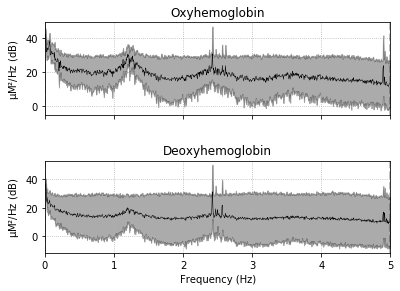

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

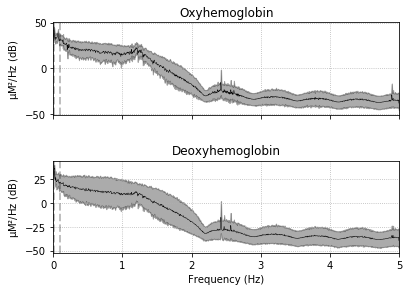

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


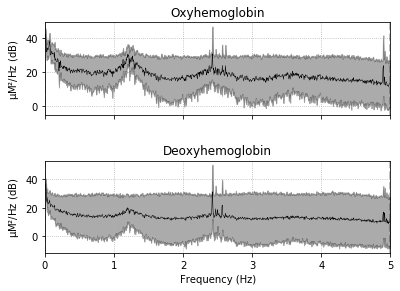

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

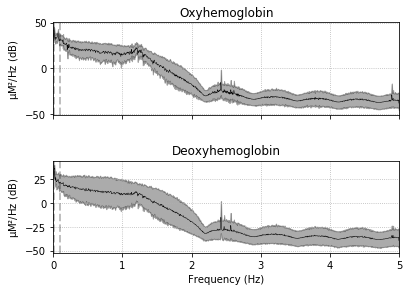

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


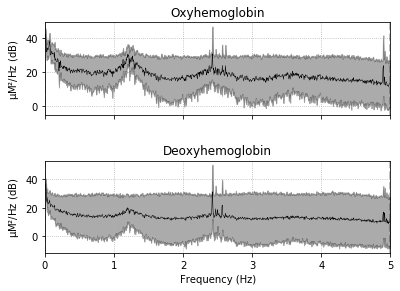

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

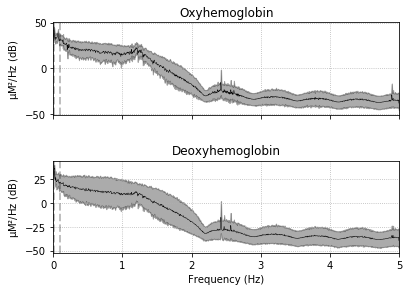

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


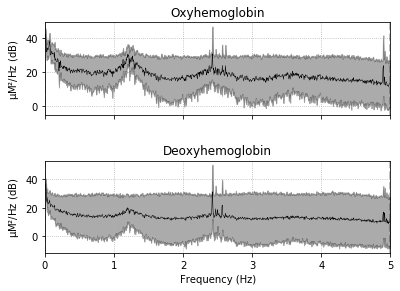

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

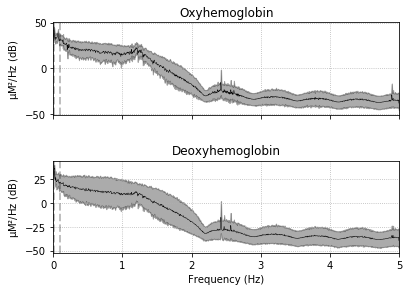

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


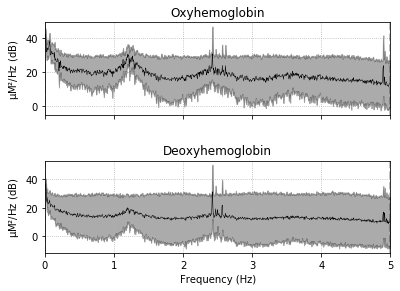

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

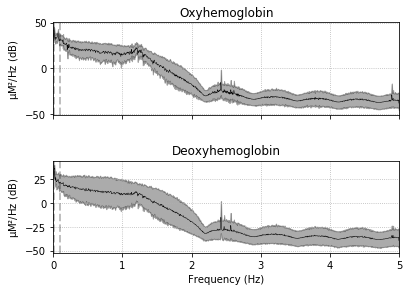

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


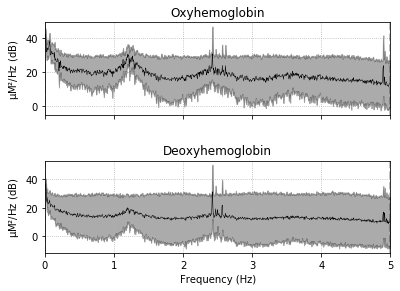

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

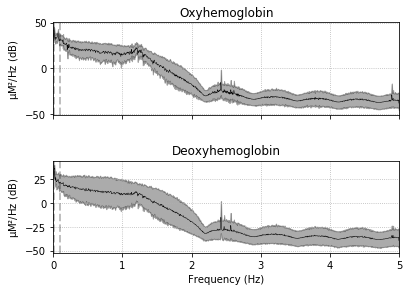

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


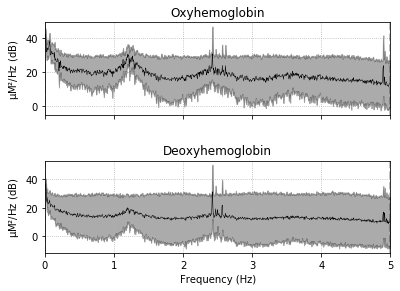

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

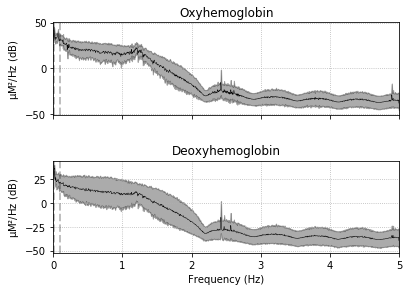

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


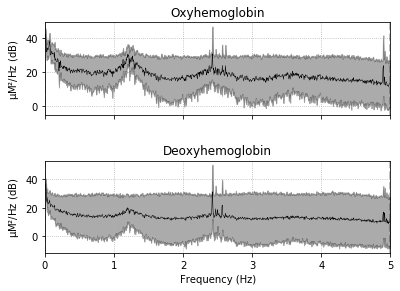

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

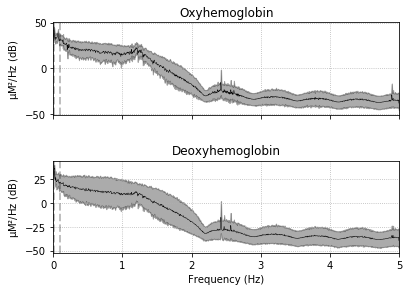

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


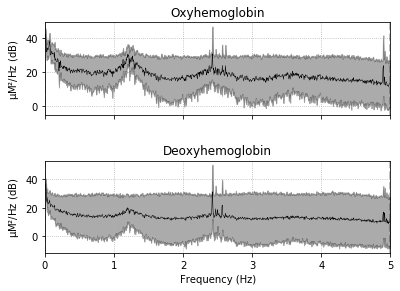

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

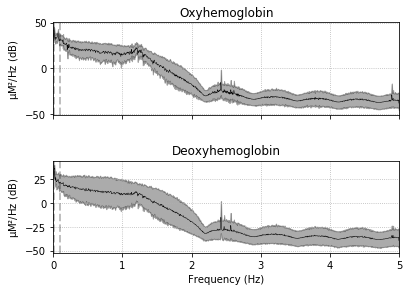

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


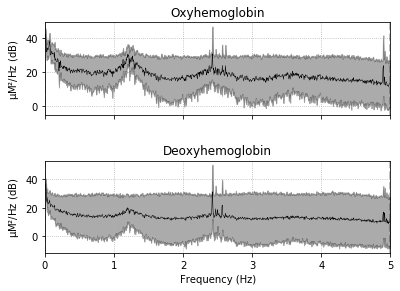

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

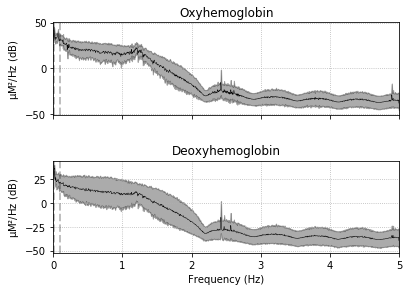

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


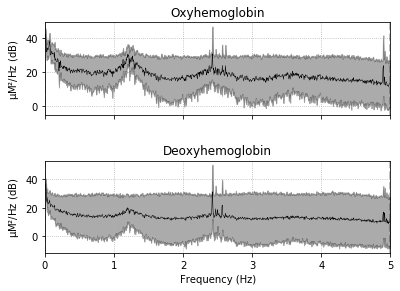

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

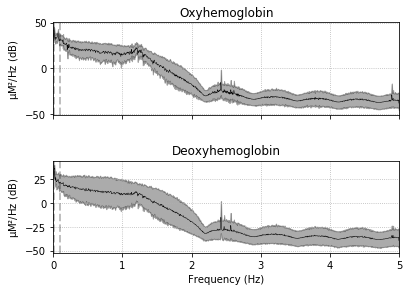

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


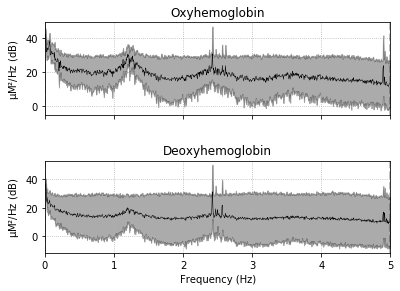

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

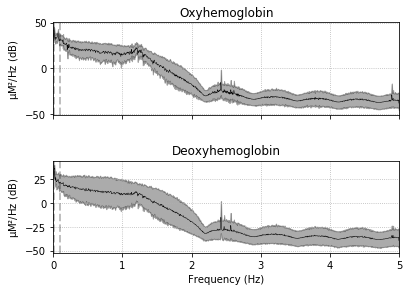

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


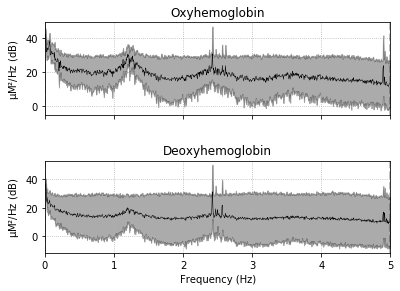

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

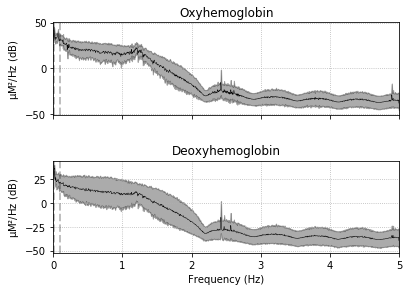

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


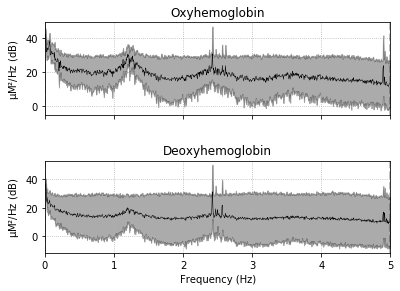

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

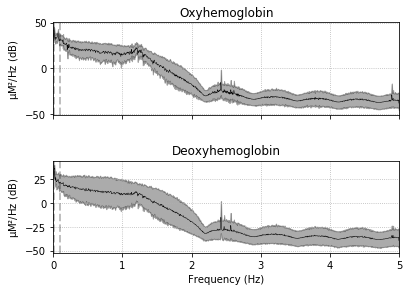

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


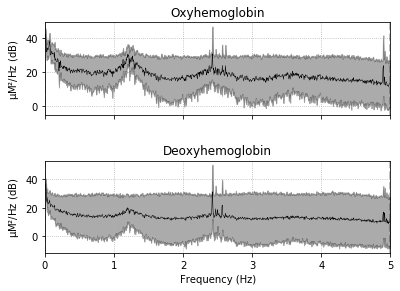

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

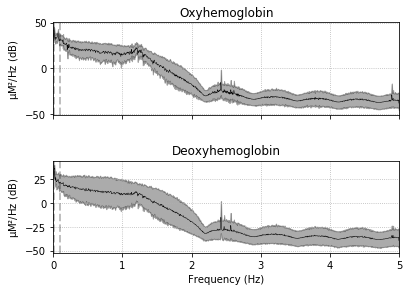

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


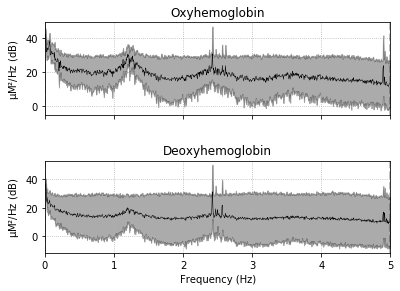

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

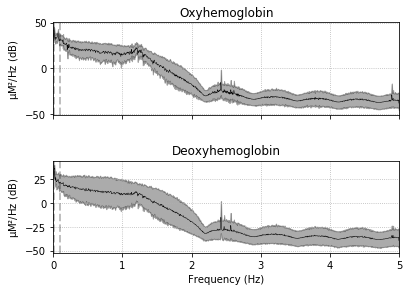

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


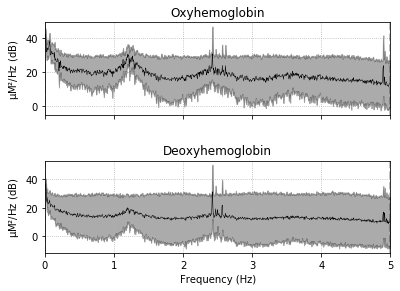

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

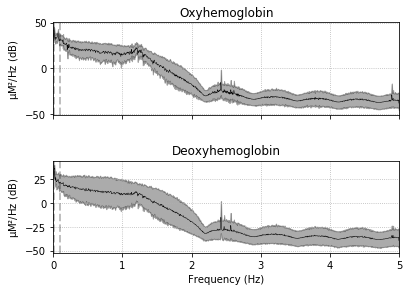

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


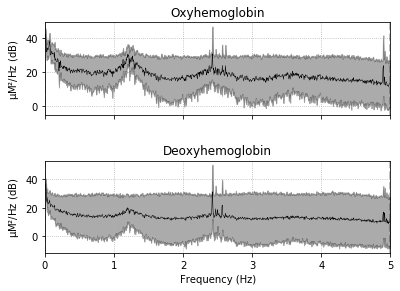

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

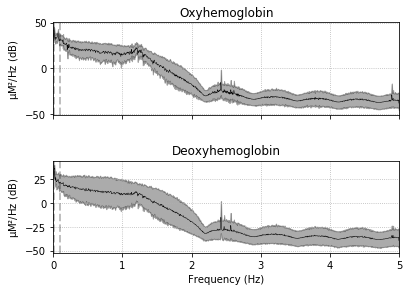

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


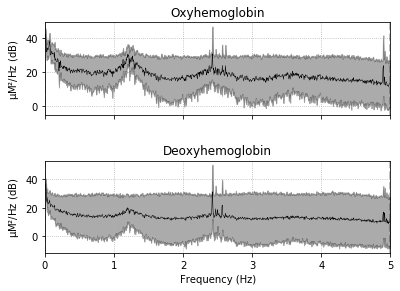

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

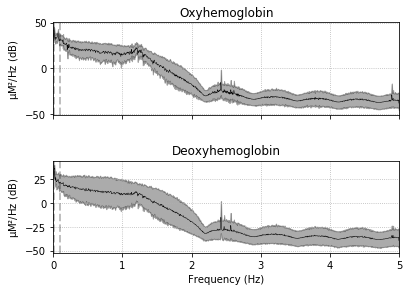

In [29]:
#Band-pass HbO and HbR from 0.01Hz to 0.1 Hz


for i in range(29):
    fig = raw1_haemo["subject{0}".format(i+1)].plot_psd(average=True)
    fig.suptitle('Before filtering', weight='bold', size='x-large')
    fig.subplots_adjust(top=0.88)
    raw1_haemo["subject{0}".format(i+1)] = raw1_haemo["subject{0}".format(i+1)].filter(0.01, 0.1, h_trans_bandwidth='auto',
                                 l_trans_bandwidth='auto')
    raw2_haemo["subject{0}".format(i+1)] = raw2_haemo["subject{0}".format(i+1)].filter(0.01, 0.1, h_trans_bandwidth='auto',
                                 l_trans_bandwidth='auto')
    raw3_haemo["subject{0}".format(i+1)] = raw3_haemo["subject{0}".format(i+1)].filter(0.01, 0.1, h_trans_bandwidth='auto',
                                 l_trans_bandwidth='auto')
    fig = raw1_haemo["subject{0}".format(i+1)].plot_psd(average=True)
    fig.suptitle('After filtering', weight='bold', size='x-large')
    fig.subplots_adjust(top=0.88)

# Extracting Epochs

In [30]:
filenames = [r"C:\Users\bio86\Downloads\NIRS_01-29\subject 01\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 02\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 03\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 04\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 05\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 06\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 07\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 08\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 09\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 10\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 11\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 12\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 13\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 14\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 15\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 16\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 17\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 18\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 19\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 20\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 21\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 22\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 23\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 24\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 25\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 26\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 27\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 28\mrk.mat",
            r"C:\Users\bio86\Downloads\NIRS_01-29\subject 29\mrk.mat"]

In [34]:
#Extracting Epochs
matlab_mrk = {}
nirs_events1 = {}
nirs_events2 = {}
nirs_events3 = {}

for i in range(29):  
    matlab_mrk["subject{0}".format(i+1)] = loadmat(filenames[i])
    
for i in range(29):
    nirs_events1["subject{0}".format(i+1)]=np.transpose(np.vstack(
            ((matlab_mrk["subject{0}".format(i+1)]['mrk'][0][0][0][0][0][0])/100,
             np.vstack((np.zeros(20),np.transpose(matlab_mrk["subject{0}".format(i+1)]['mrk'][0][0][0][0][1][0][0][0])[0])))))
    nirs_events2["subject{0}".format(i+1)]=np.transpose(np.vstack(
            ((matlab_mrk["subject{0}".format(i+1)]['mrk'][0][2][0][0][0][0])/100,
             np.vstack((np.zeros(20),np.transpose(matlab_mrk["subject{0}".format(i+1)]['mrk'][0][2][0][0][1][0][0][0])[0])))))
    nirs_events3["subject{0}".format(i+1)]=np.transpose(np.vstack(
            ((matlab_mrk["subject{0}".format(i+1)]['mrk'][0][4][0][0][0][0])/100,
             np.vstack((np.zeros(20),np.transpose(matlab_mrk["subject{0}".format(i+1)]['mrk'][0][4][0][0][1][0][0][0])[0])))))

In [35]:
#Information about the events
event_id = dict(LMI=1, RMI=2)

In [37]:
#Create epochs objects and perform Baseline correction
epochs1 = {}
epochs2 = {}
epochs3 = {}

for i in range(29):
    epochs1["subject{0}".format(i+1)] = mne.Epochs(raw1_haemo["subject{0}".format(i+1)], events=nirs_events1["subject{0}".format(i+1)].astype(int),tmin=-5,tmax=2,
                         event_id=event_id,proj=True, baseline=(-5, 2),
                         preload=True,detrend=None, verbose=True)
    epochs2["subject{0}".format(i+1)] = mne.Epochs(raw1_haemo["subject{0}".format(i+1)],  events=nirs_events2["subject{0}".format(i+1)].astype(int),tmin=-5,tmax=2,
                         event_id=event_id,proj=True, baseline=(-5, 2),
                         preload=True,detrend=None, verbose=True)
    epochs3["subject{0}".format(i+1)] = mne.Epochs(raw1_haemo["subject{0}".format(i+1)], events=nirs_events3["subject{0}".format(i+1)].astype(int),tmin=-5,tmax=2,
                         event_id=event_id,proj=True, baseline=(-5, 2),
                         preload=True,detrend=None, verbose=True)


20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching eve

Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data fo

Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 71 original time points ...
0 bad epochs dropped


In [38]:
#Concatenate raws
epochs = {}

for i in range(29):
    epochs["subject{0}".format(i+1)] = mne.concatenate_epochs((epochs1["subject{0}".format(i+1)],
                                                               epochs2["subject{0}".format(i+1)],
                                                               epochs3["subject{0}".format(i+1)]),add_offset=True)

60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped
60 matching events 

## CSP Classification

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

In [41]:
test = {}

for i in range(29):
    test["subject{0}".format(i+1)] = epochs["subject{0}".format(i+1)].copy()

In [42]:
# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs_train = {}
labels = {}

for i in range(29):
    epochs_train["subject{0}".format(i+1)] = test["subject{0}".format(i+1)].copy().crop(tmin=1, tmax=2)
    labels["subject{0}".format(i+1)] = test["subject{0}".format(i+1)].events[:, -1]

Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.8e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.6e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.7e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Done.


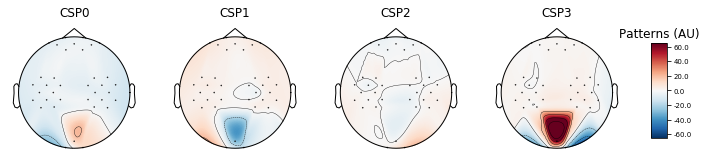

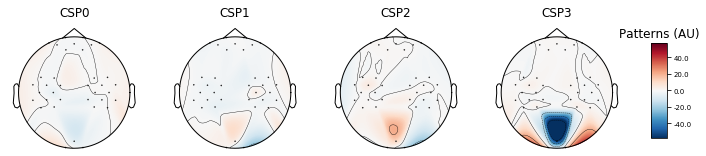

Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.4e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 8.2e+09  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


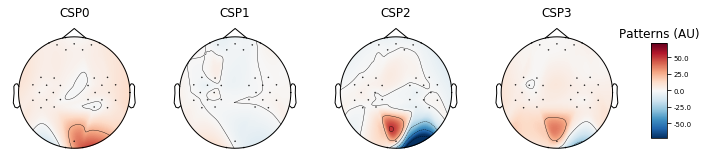

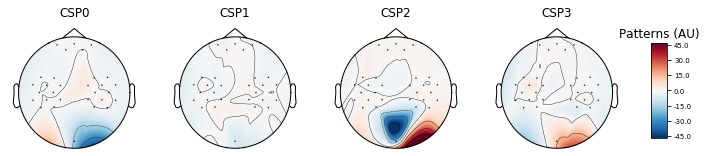

Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 72 dim * 6.2e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 7.9e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 8.4e+09  max singular value)
   

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


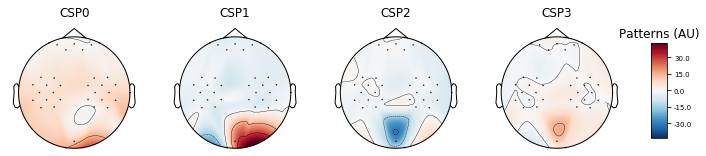

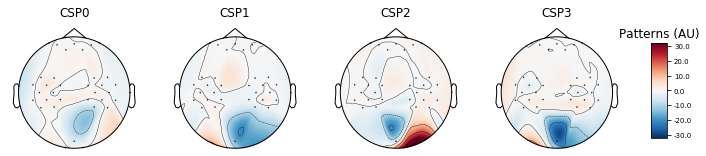

Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 6.7e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 8.2e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.3e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.1e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


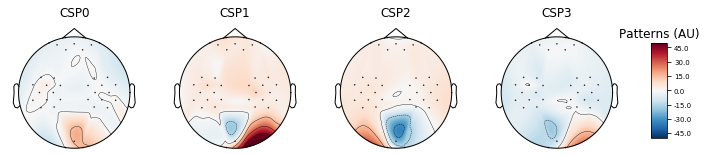

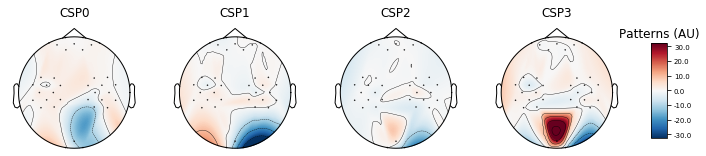

Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.7e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 72 dim * 6.5e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.8e-05 (2.2e-16 eps * 72 dim * 6.1e+09  max singular value)
 

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.


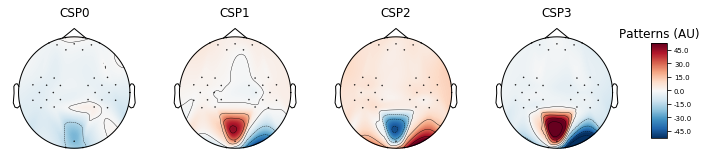

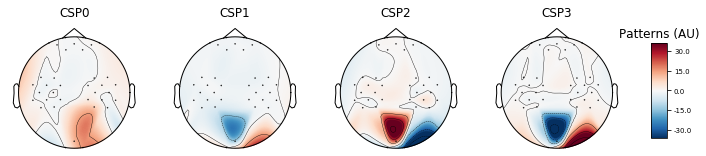

Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.8e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 8.2e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.5e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 8.4e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


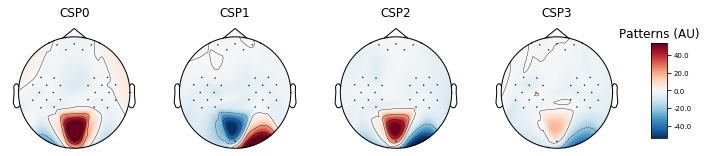

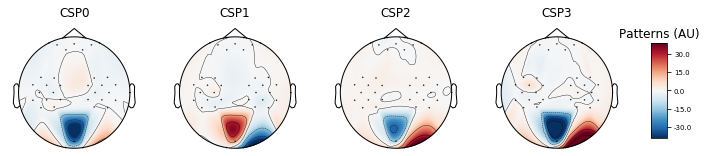

Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.4e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.3e-05 (2.2e-16 eps * 72 dim * 5.8e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 6.8e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.


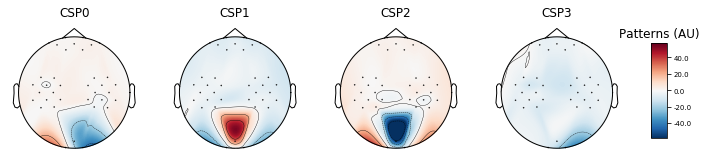

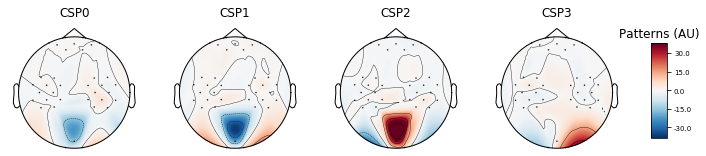

Computing rank from data with rank=None
    Using tolerance 0.0001 (2.2e-16 eps * 72 dim * 6.5e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.2e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00012 (2.2e-16 eps * 72 dim * 7.5e+09  max singular value)
 

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Estimating covariance using EMPIRICAL
Done.


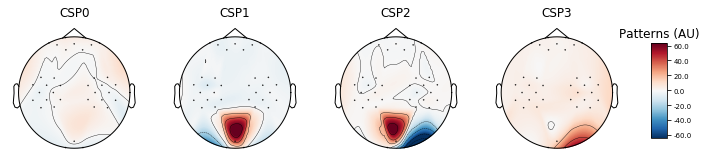

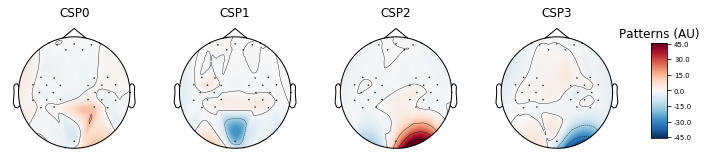

Computing rank from data with rank=None
    Using tolerance 9.9e-05 (2.2e-16 eps * 72 dim * 6.2e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.5e-05 (2.2e-16 eps * 72 dim * 5.9e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.2e+09  max singular value)


C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


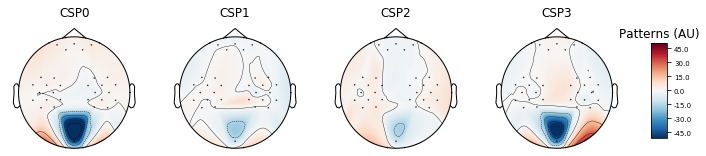

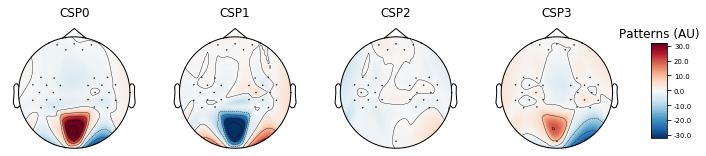

Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 7.1e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 8e+09  max singular value)
    Es

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


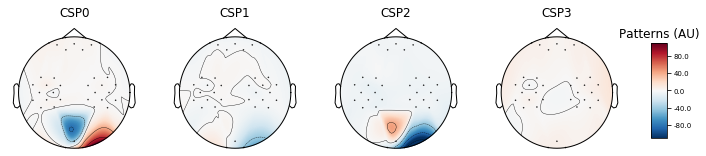

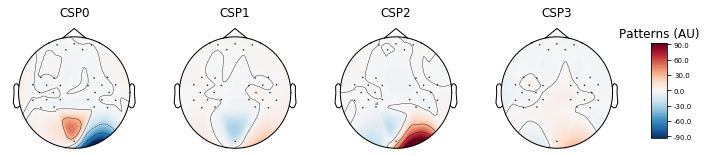

Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 72 dim * 9e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 6.6e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00013 (2.2e-16 eps * 72 dim * 8.3e+09  max singular value)
    Estimated rank (mag): 72
    MAG: rank 72 computed from 72 data channels with 0 projectors
Reducing data rank from 72 -> 72
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 72 dim * 6.6e+09  max singular value)
  

C:\Users\bio86\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


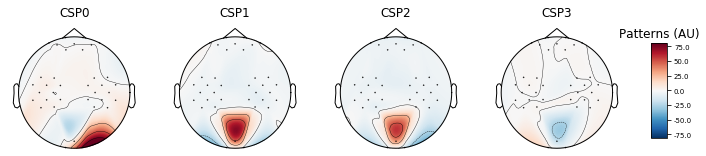

In [ ]:
csp = {}
scores = {}
epochs_data = {}
epochs_data_train = {}
cv_split = {}
class_balance = {}
lda = {}
csp = {}
clf = {}

for i in range(29):
    # Define a monte-carlo cross-validation generator (reduce variance):
    scores["subject{0}".format(i+1)] = []
    epochs_data["subject{0}".format(i+1)] = test["subject{0}".format(i+1)].get_data()
    epochs_data_train["subject{0}".format(i+1)] = epochs_train["subject{0}".format(i+1)].get_data()
    cv = ShuffleSplit(10, test_size=0.2, random_state=42)
    cv_split["subject{0}".format(i+1)] = cv.split(epochs_data_train["subject{0}".format(i+1)])

    # Assemble a classifier
    lda["subject{0}".format(i+1)] = LinearDiscriminantAnalysis()
    csp["subject{0}".format(i+1)] = CSP(n_components=4, reg=None, log=True, norm_trace=False)

    # Use scikit-learn Pipeline with cross_val_score function
    clf["subject{0}".format(i+1)] = Pipeline([('CSP', csp["subject{0}".format(i+1)]), ('LDA', lda["subject{0}".format(i+1)])])
    scores["subject{0}".format(i+1)] = cross_val_score(clf["subject{0}".format(i+1)], epochs_data_train["subject{0}".format(i+1)], labels["subject{0}".format(i+1)], cv=cv, n_jobs=1)

    # Printing the results
    class_balance["subject{0}".format(i+1)] = np.mean(["subject{0}".format(i+1)] == labels["subject{0}".format(i+1)][0])
    class_balance["subject{0}".format(i+1)] = max(class_balance["subject{0}".format(i+1)], 1. - class_balance["subject{0}".format(i+1)])
    print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores["subject{0}".format(i+1)]),
                                                          class_balance["subject{0}".format(i+1)]))
    
    # plot CSP patterns estimated on full data for visualization
    csp["subject{0}".format(i+1)].fit_transform(epochs_data["subject{0}".format(i+1)], labels["subject{0}".format(i+1)])

    csp["subject{0}".format(i+1)].plot_patterns(test["subject{0}".format(i+1)].info, ch_type='hbo', units='Patterns (AU)', size=1.5)
    csp["subject{0}".format(i+1)].plot_patterns(test["subject{0}".format(i+1)].info, ch_type='hbr', units='Patterns (AU)', size=1.5)
